In [ ]:
# Importar as bibliotecas que vamos utilizar

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Utlizando dataset no drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dados = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Bootcamp/weather_szeged_train.xlsx', sep=',', encondig = 'UTF8')
dados2= pd.read_excel('/content/drive/My Drive/Colab Notebooks/Bootcamp/weather_szeged_test.xlsx', sep=',', encondig = 'UTF8')

In [ ]:
dados.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
0,19.400000,19.400000,0.93,6.2790,14.7315,1018.23
1,4.950000,3.122222,1.00,7.8890,5.8926,1000.86
2,22.661111,22.661111,0.38,13.9426,16.0517,1022.64
3,17.044444,17.044444,0.81,12.9766,14.9569,1008.99
4,1.061111,-4.494444,0.56,24.7779,15.8263,1013.73


In [ ]:
dados.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
count,998.000000,998.000000,998.000000,998.000000,998.000000,998.00000
mean,10.978084,9.908962,0.773317,10.299289,9.739774,999.05508
std,9.367005,10.594406,0.170484,6.747872,4.016944,139.47797
min,-14.022222,-19.961111,0.290000,0.000000,0.000000,0.00000
25%,2.800000,0.795833,0.670000,4.878300,7.973525,1012.91250
50%,11.622222,11.622222,0.810000,9.378250,9.982000,1017.47500
75%,17.908333,17.908333,0.920000,13.821850,11.270000,1022.61500
max,32.877778,33.566667,1.000000,45.933300,16.051700,1042.83000


In [ ]:
dados.shape

(998, 6)

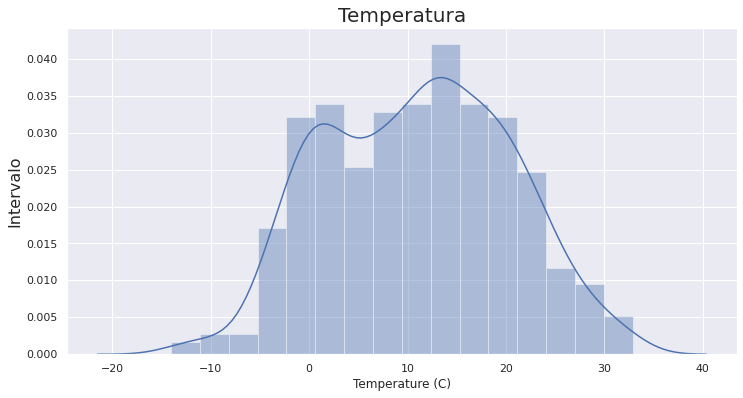

In [ ]:
ax = sns.distplot(dados['Temperature (C)'])
ax.figure.set_size_inches(12,6)
ax.set_title('Temperatura', fontsize=20)
ax.set_ylabel('Intervalo', fontsize=16)
ax

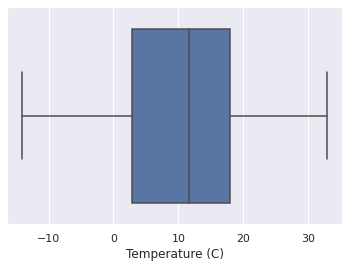

In [ ]:
sns.boxplot(dados['Temperature (C)'])

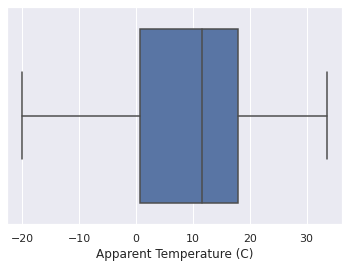

In [ ]:
sns.boxplot(dados['Apparent Temperature (C)'])

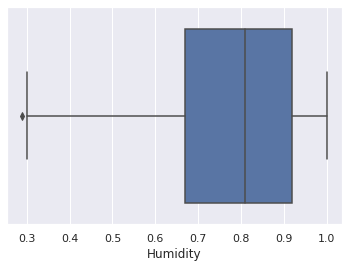

In [ ]:
sns.boxplot(dados['Humidity'])

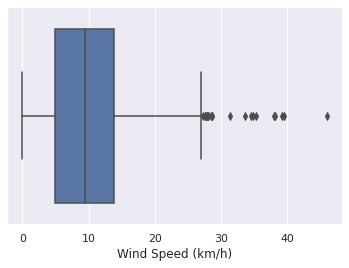

In [ ]:
sns.boxplot(dados['Wind Speed (km/h)'])

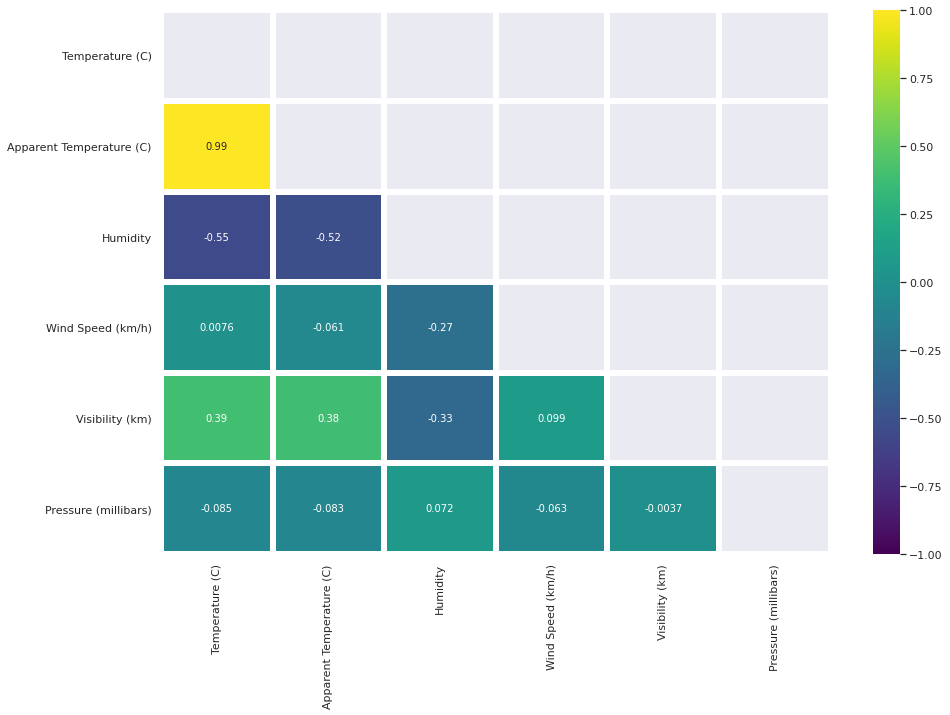

In [ ]:
corr=dados.corr(method='pearson')

np.triu ( np.ones ( corr.shape , dtype  =  bool ))
mask  =  np.triu ( np.ones ( corr.shape , dtype  =  bool ))
fig = plt.gcf() 
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 2.5)
sns.set(font_scale=1)
sns.heatmap(corr, annot=True, mask  =  mask , annot_kws={"size": 10} ,cmap="viridis",linewidths=5, vmin=-1, vmax=1)

In [ ]:
#Usaremos o mesmo target
Y = dados['Temperature (C)']


X = dados[['Apparent Temperature (C)','Visibility (km)']]

#refazendo o split
y_train, y_test, X_train, X_test = train_test_split(Y, X, test_size = 0.30, random_state=50)

In [ ]:
reg = LinearRegression()

In [ ]:
# Treinando o Modelo
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Coeficientes
print("Coeficientes: {}".format(reg.coef_))
print("Intercept: {}".format(reg.intercept_))

#Salvando perdicoes
preds_ols_sklearn = reg.predict(X_test)

#Avaliando o modelo (R^2)
print("R2: {}".format(reg.score(X_test, y_test)))

Coeficientes: [0.86689017 0.03670791]
Intercept: 2.0322611397820793
R2: 0.9858657365862288


In [ ]:
y_previsto_train = reg.predict(X_train)
y_previsto = reg.predict(X_test)

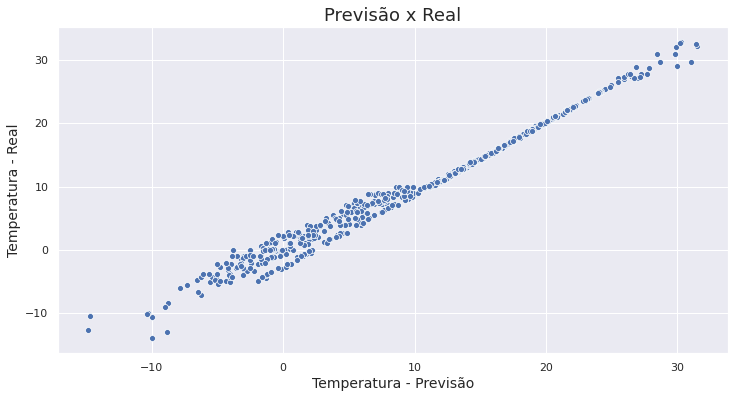

In [ ]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)

ax.figure.set_size_inches(12,6)
ax.set_title('Previsão x Real', fontsize=18)
ax.set_xlabel('Temperatura - Previsão', fontsize = 14)
ax.set_ylabel('Temperatura - Real', fontsize = 14)
ax

In [ ]:
residuo = y_train - y_previsto_train
residuo

865    0.064043
553   -0.449906
468    0.740542
44    -0.686691
8     -0.568812
         ...   
289   -0.108528
109    0.699579
907   -2.056510
480   -0.269944
688    0.572815
Name: Temperature (C), Length: 698, dtype: float64

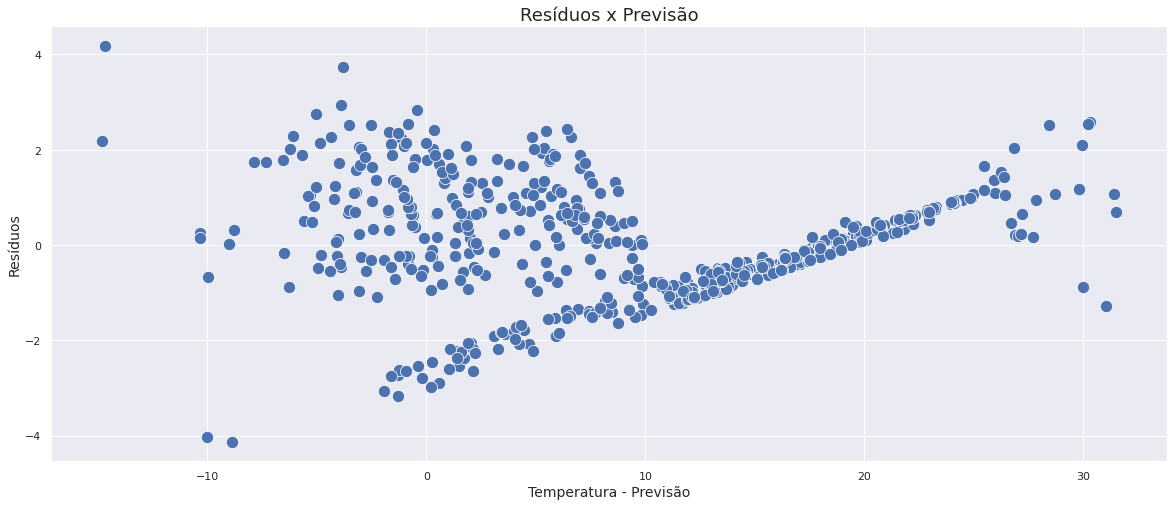

In [ ]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo, s=150)

ax.figure.set_size_inches(20,8)
ax.set_title('Resíduos x Previsão', fontsize=18)
ax.set_xlabel('Temperatura - Previsão', fontsize = 14)
ax.set_ylabel('Resíduos', fontsize = 14)
ax

In [ ]:
X2 = dados[['Humidity', 'Visibility (km)']]

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y, test_size=0.3, random_state=50)

In [ ]:

reg_2 = LinearRegression()
reg_2.fit(X2_train, y2_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Obtendo o coeficiente de determinação (R²) do novo modelo estimado e comparando com o resultado do modelo anterior
print('R²={}'.format(reg_2.score(X2_train, y2_train).round(2)))
print('R³ = {}'.format(reg.score(X_train, y_train).round(2)))

R²=0.29
R³ = 0.99


In [ ]:
y_previsto = reg.predict(X_test)
y_previsto_2 = reg_2.predict(X2_test)


In [ ]:
# Obtendo o coeficiente de determinação (R²) para as previsões dos dois modelos
print('R²={}'.format(metrics.r2_score(y2_test, y_previsto_2).round(2)))
print('R³ = {}'.format(metrics.r2_score(y_test, y_previsto).round(2)))

R²=0.39
R³ = 0.99


In [ ]:
## Obtendo métricas

In [ ]:
EQM = metrics.mean_squared_error(y_test, y_previsto).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)
R2=metrics.r2_score(y_test, y_previsto).round(2)
pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,1.27
REQM,1.13
R²,0.99


In [ ]:
EQM_2 = metrics.mean_squared_error(y2_test, y_previsto_2).round(2)
REQM_2 = np.sqrt(metrics.mean_squared_error(y2_test, y_previsto_2)).round(2)
R2_2=metrics.r2_score(y2_test, y_previsto_2).round(2)

pd.DataFrame([EQM_2, REQM_2, R2_2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,68.26
REQM,8.26
R²,0.39
